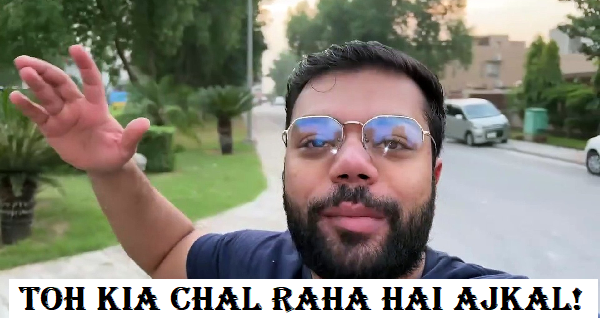

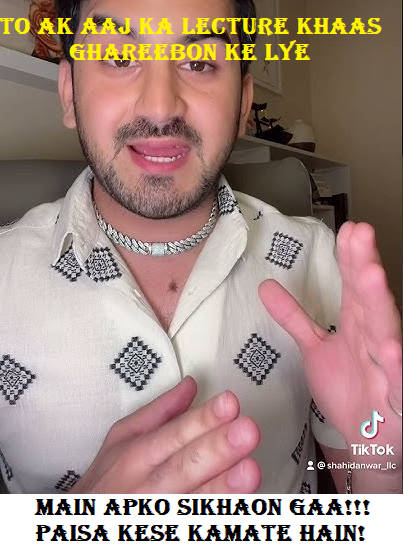

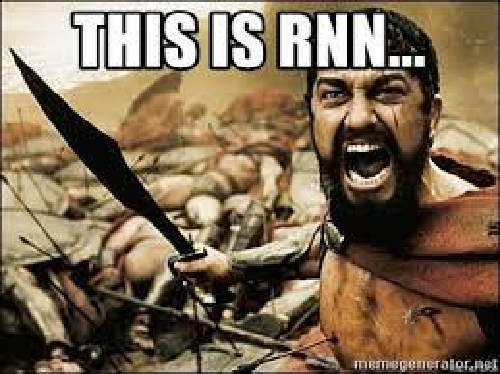

# Recurrent Neural Network (RNN)

****RNNs are a type of artificial neural networks designed to recognize patterns in sequence of data such as text, hand writing, speech, and time series data****

****RNNs is a special category of NN that allow flow of information in both directions****

****It has short-term memory that enables it to take into account the previous input when producing an output****

****This short term memory allows RNN to retain past information allowing it to recognize relationships between data points (sequences) that are far from eachother****

****RNNs are mainly used to time series and sequence data such as text and audio****

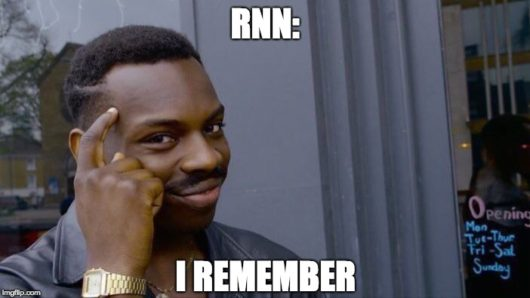

### Explaination

****Usually in neural networks the input and the output are independant of eachother, but in RNNs the output depends on the previous elementals within the sequence*****

****RNNs also share parameters across each layer of the network*****

****In traditional ANNs, the weights are different across each each node, whereas RNNs share same weights within the each layer of the network****

****In RNNs during gradient descent, the wieghts and bias are adjusted individually to reduce the loss*****

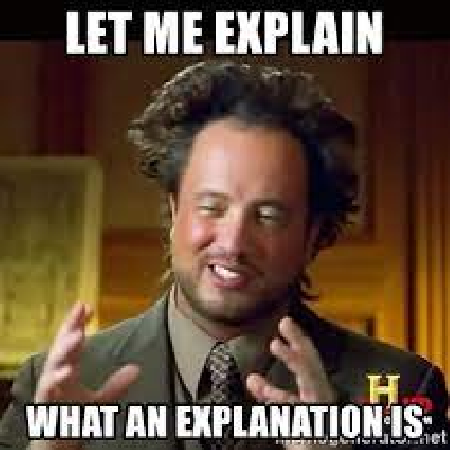

### RNN Vs ANN

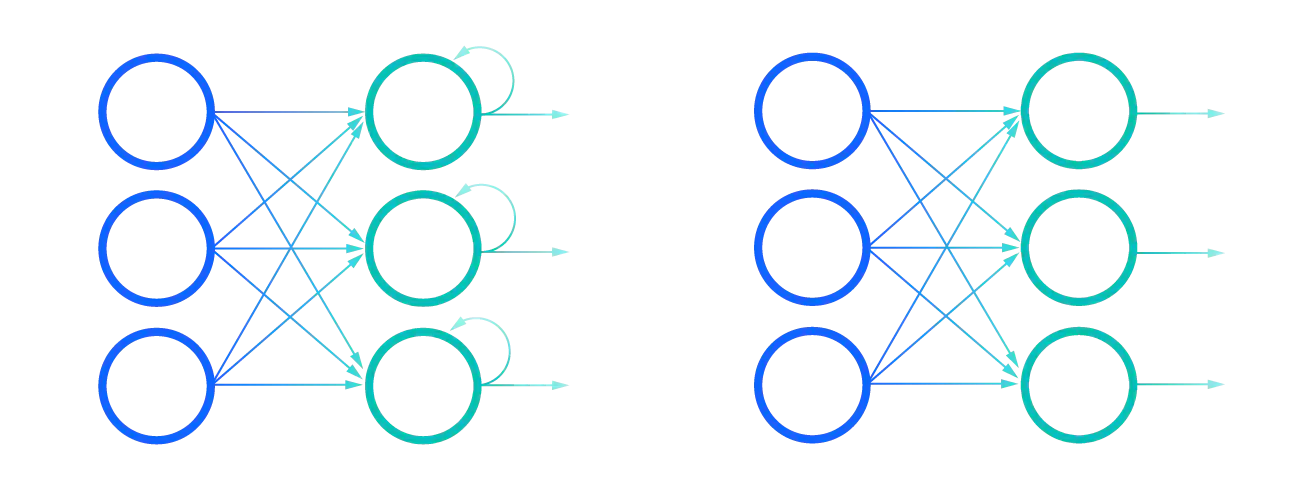

#### In an image classification task, where we have a trained a neural network to classify images of animals, say an elephant, and a dog
#### When we feed the image of an elephant or a dog, the neural network provides an output with a corrosponding label to the image of the elephant or a dog respectively

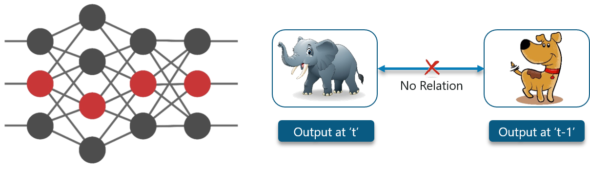

#### In this example, the first ouput (elephant) will have no influence on the previous output (dog)
#### This means that the output at time 't' is independant of time 't-1'

### Let's consider another scenario

#### Suppose we're reading a Novel. With every page we read, we need the understanding of the previous pages to get complete sense of the story
****With traditional NN (feed-forward-network) the new output at time 't+1' (next page) has absolutely no relation with the ouputs at 't' (current page), -- 't-1'(last page we read), 't-2' (second last page), or 't-3' (third last page)****

#### Therefore a feed forward network cannot be used when predicting a sequence or a word in a sentence, as it will have no absolute relation with the previous set of words

### But with RNNs this can be overcome

### How will RNN Tackle this Challenge?

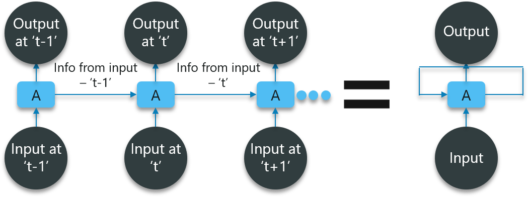

#### In the above diagram, we have certain inputs at ‘t-1’ which is fed into the network. These inputs will lead to corresponding outputs at time ‘t-1’ as well.

#### At the next timestamp, information from the previous input ‘t-1’ is provided along with the input at ‘t’ to eventually provide the output at ‘t’ as well.

#### This process repeats, to ensure that the latest inputs are aware and can use the information from the previous timestamp is obtained

## Applications of RNN

### 1) Image Captioning

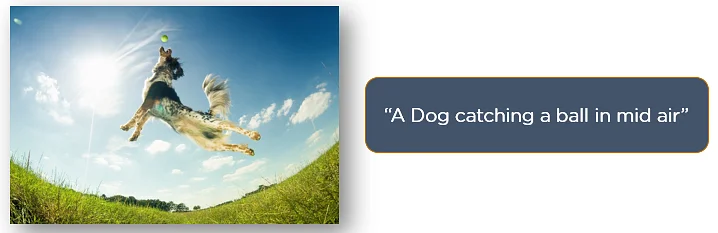

****RNNs are used to caption images (i.e generate textual description of an image)****

### 2) Time Series Analysis

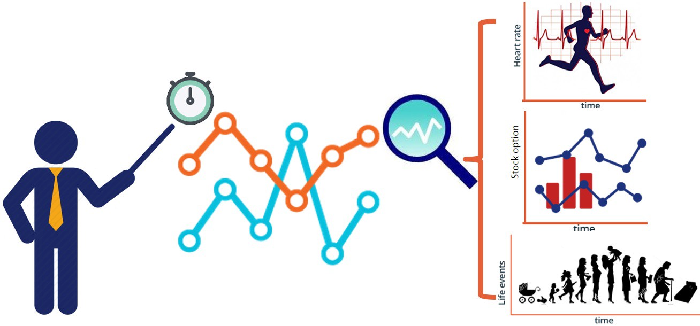

****Since RNNs handle sequential data effectively, hence these are used in predicting the stock prices,  crypto price  prediction etc****

### 3) Natural Language Processing

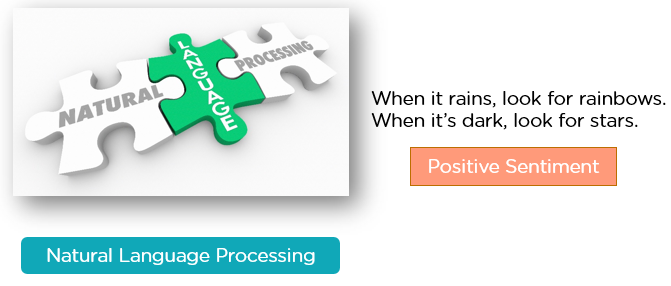

****In NLP, text mining and sentiment analysis are carried out using RNNs****

### 4) Machine Translation

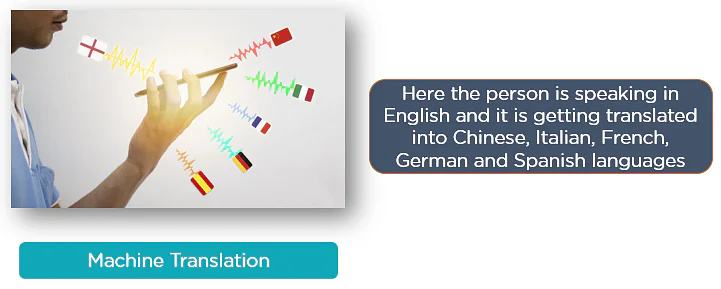

****RNNs can be used for language translation, i.e translating words, sentences from one language to another****

### Types of RNN

****There are four main types of RNN*****

* ****One to One**** *single input and single output*

* ****One to Many**** *single input and multiple outputs for instance image captioning*

* ****Many to One**** *multiple inputs and a single output for instance sentiment analysis*

* ****Many to Many**** *multiple inputs and multiple outputs for instance machine translation*

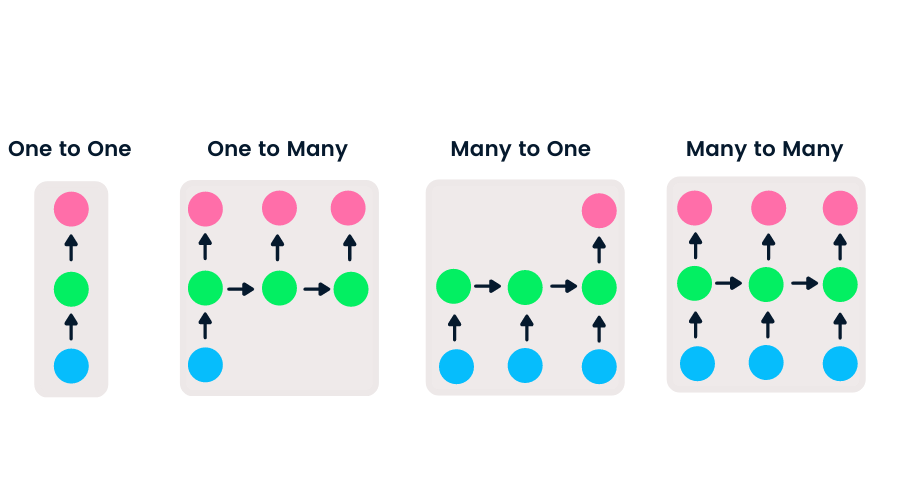

### Basic RNN

#### RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations

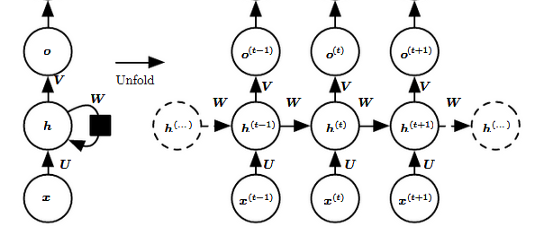

***L.H.S represents the generic representation of a recurrent neural network*****

****R.H.S represents the unfolded version of the generic symbol for representing the network for an entire sequence****

****If the sequence is a sentence which contain 4 words, then a network will be unfoled into 4 layers, one layer for each word****

### Input

####  $x$ == > input at time 't' for example $x_1$ could be an encoded vector corrosponding to a word of  a sequence

### Hidden State

#### $h(t)$  represents hidden state at time t, and acts as a memory of the network. $h(t)$ is calculated based on the current input and the previous time step's hidden state:
#### $$\Large h(t) = f(U.x(t) + W.h(t-1))$$

****Where h(t-1) represents the hidden state of the previous step****

****f represents a function that is non-linear (tanh or ReLU)****

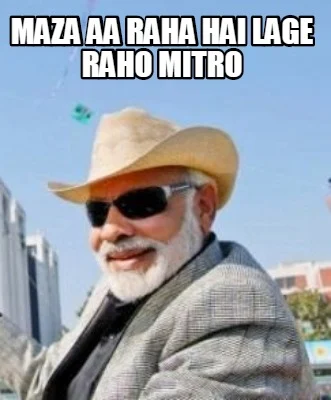

### Connections in an RNN

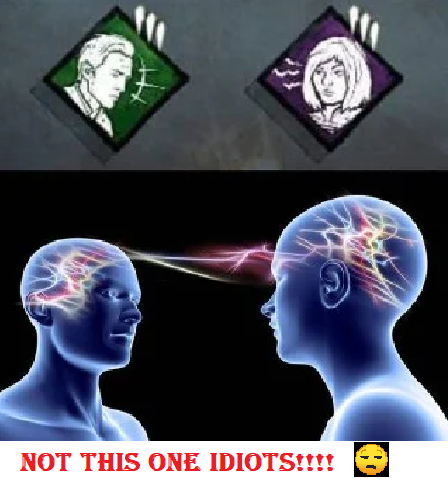

****There are three different connections in an RNN****

* ****Input to Hidden Connection****

* ****Hidden to Hidden Connection****

* ****Hidden to Output Connnection****

****Each of these connections is assigned a weight****

### Weights

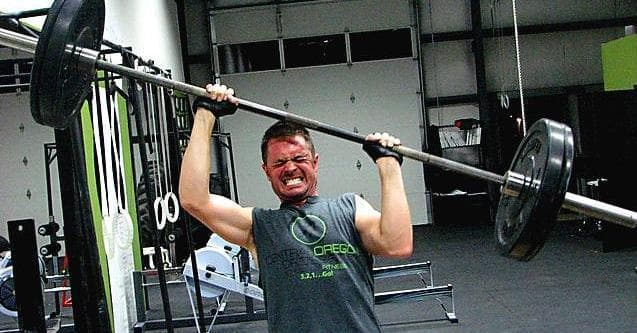

****The input to hidden connection is assigned a weight 'U'****

****The hidden to hidden connection is assigned a weight 'W'****

****The hidden to output connection is assigned a weight 'V'****

#### All these weights (U, V, and W) are shared accross time

### Output

****$o(t)$ represents output of the network as shown in the figure above****

### How does a Recurrent Neural Network Works?

****RNNs work by applying Backprogation Through Time (BPTT) which is slightly different from the traditional backpropagation as it is specific for sequence data****

****The principles of BPTT are the same as traditional backpropagation, where model adjjust its parameters by calculating the error from inputs to outputs****

****Here in RNNs, BPTT sums up the error from each time step whereas feed forward NN do not need to sum the error as they do not share parameters across each layer****

****Unlinke Barckprapagation that we normally use in NN, here the weights for the current and the previous inputs are updated, thus calculating error for each time step****

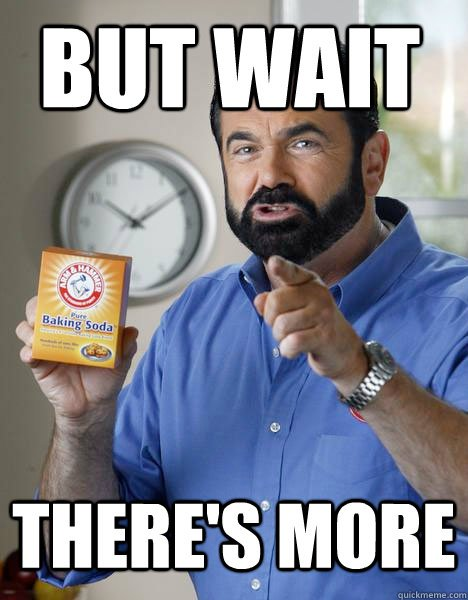

### Problems with RNN

#### There are two main issues that RNN usually face 

* ****Vanishing Gradient Problem****

* ****Exploding Gradient Problem****

#### These gradient issues are defined by the size of the gradient 

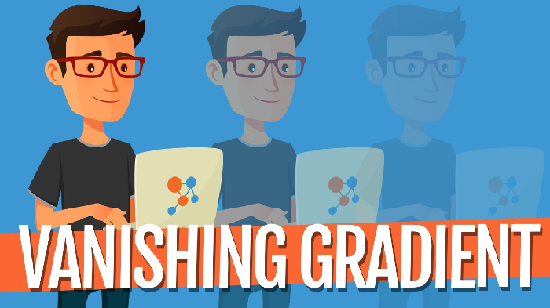

### 1) Vanishing Gradient Problem

#### When the gradient is too small, it continues to become smaller, updating the weight parameters untill they become insignificant, i.e 0

#### When this gradient become too small, the algorithm is no longer learning, hence the updating the weights has no effect making the gradient descent to vanish i.e not reaching the global minimum

#### Since in RNNs the hidden state of one observation is used to train the hidden state of the next layer, this implies that the cost function is calucated  for each observation


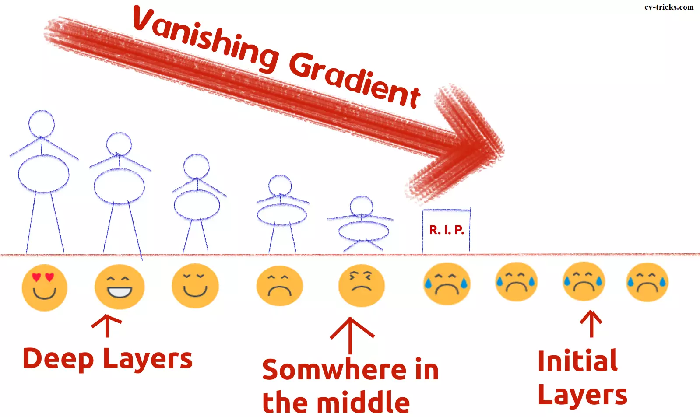

#### This means that the cost function calculated at the current layer will be used to update the weights of neurons at the previous layer

#### The problem relates to updating wrec (weight recurring) – the weight that is used to connect the hidden layers to themselves in the unrolled temporal loop

#### So, we multiply with the same exact weight multiple times, and this is where the problem arises: when you multiply something by a small number, your value decreases very quickly

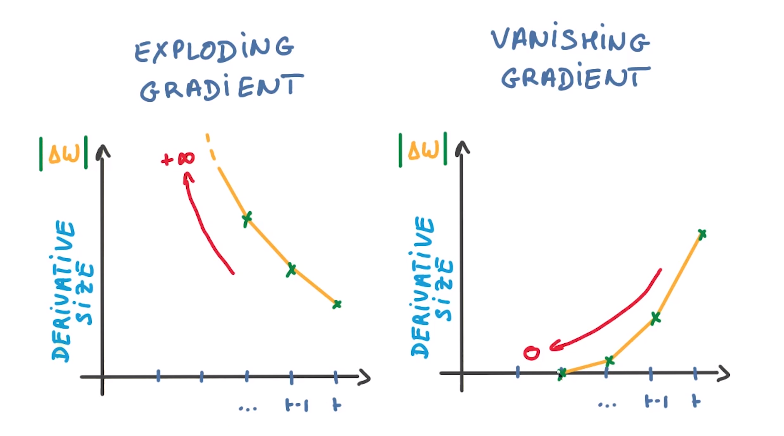

### 2) Exploding Gradient Problem

#### Exploding gradient occurs when the gradient is too large, creating an unstable model

#### In this case the weights become so large, that they eventually be represented as NaN

### Enough Theory! Let's Build a Model

In [251]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [252]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Checking if we have any null values in the dataset

In [254]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Converting Categorical Labels into Discrete

In [255]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [256]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

### Exploring Data

##### First let's see how positive and negative reviews look like

#### Positive Review Example

In [257]:
positive = data[data.sentiment == 1].sample(n = 1)['review'].iloc[0]
positive

"Although it's definitely an enjoyable way to spend a couple of hours and it's always worth a watch, this film never quite meets the targets that it should for two reasons. Firstly, after the first forty-five minutes or so it focuses heavily on Helen and Johnny, who are far less interesting characters than most of the others - Janet, Jennifer, George and Miss Scattergoods are all much more enticing. Although at first this works, since in life we don't always know everything about everyone else, and because the point is being made that perhaps Helen is slightly self-involved, it quickly wears thin and we want to see more of the other characters.<br /><br />Secondly, the film seems to lose its way in terms of plot in the second half. The letter itself holds far less significance than it does in the first half and, again, although this works well in some ways, it seems odd to leave so much of the potential displayed in the first half behind.<br /><br />Overall, this film is sweet and good

#### Negative Review Example

In [258]:
negative = data[data.sentiment == 0].sample(n = 1)['review'].iloc[0]
negative

"Quentin Tarantino once said that to succeed in the film industry you had to make your own Pulp Fiction or Reservoir Dogs. Writer/actor/director Larry Bishop seems to have taken that advice a little too literally with Hell Ride and concocted a messy homage that borrows much too heavily in its visuals, music, camera-work, and time-altering storytelling. But to properly mimic a Tarantino film, one has to have a knack for constructing creative conversations; unfortunately Hell Ride's primary derailing element is its atrocious ramblings and vulgar monologues that only work to disgust and confuse the audience while simultaneously invoking pity for the actors just for being involved.<br /><br />The anti-hero protagonist biker gang, The Victors, consists of several weathered vigilantes who bring their own brand of bloodthirsty justice to the lawless roads. The leader, Pistolero (Larry Bishop), is hell-bent on revenge and putting out fires. The Gent (Michael Madsen) just tries to balance his c

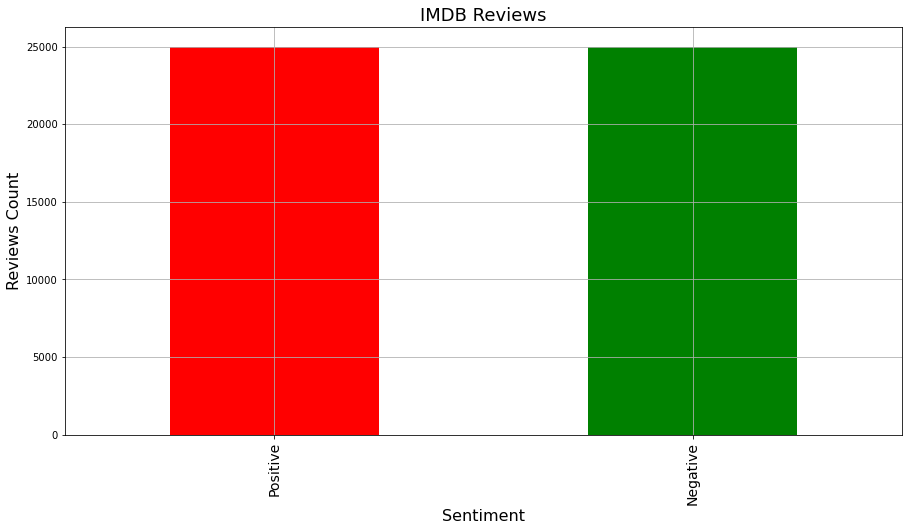

In [259]:
fig, axs = plt.subplots(figsize = (15,7.5))

data['sentiment'].value_counts().plot.bar(color = ['red', 'green'])

plt.xticks(np.arange(2), ('Positive', 'Negative'), fontsize = 14)
axs.set_title('IMDB Reviews', fontsize = 18)
axs.set_xlabel('Sentiment', fontsize = 16)
axs.set_ylabel('Reviews Count', fontsize = 16)
axs.grid()
plt.show()

In [260]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### 1) Removing HTML Tags using Regular Expression

****Let's extract first 10 reviews from the dataset****

In [261]:
sample = data.head(10)

In [262]:
sample.drop(columns = 'sentiment')

review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...
5  Probably my all-time favorite movie, a story o...
6  I sure would like to see a resurrection of a u...
7  This show was an amazing, fresh & innovative i...
8  Encouraged by the positive comments about this...
9  If you like original gut wrenching laughter yo...

In [263]:
doc = []
for text in sample.values:
    doc.append(text)
    

****To remove HTML tags from the data we'll be using these 10 reviews as sample to develop a regular expression****

In [264]:
for i in doc:
    print(doc)

[array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

****Exporting this sample as .txt file. We'll be pasting this sample to regex101 website to come up with a regular expression****

In [265]:
sample.to_csv('document_reviews.txt')

In [266]:
data.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [267]:
data1 = []
for review in data.review.values:
    data1.append((review))

In [268]:
data['review'] = data1

#### Dealing with the stopwords

In [269]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [270]:
stop_words = set(stopwords.words('english'))

****We'll remove 'not' stopword from the corpus of stopwords, as it implies a negative review in the dataset, which is important information****

In [271]:
stopwords = stop_words.remove('not')

In [272]:
import re

#### Preprocessing 

****Removing HTML tags****

****Removing irrelevant characters****

****Converting entire corpus into lower case****

****Removing stopwords****

****Converting entire dataset into lowercase****

****Tokenization****

****Normalization (Lemmatization)****

In [273]:
preprocessed_review = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    review = review.lower()                                 # Converting all the text in reviews to lower case
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    preprocessed_review.append(lemmas)


In [274]:
print(preprocessed_review[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen not got polari voice pat truly see seamless editing guided reference williams diary entry not well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [275]:
len(preprocessed_review)

50000

#### Just for comparison adding our preprocessed column in the dataset

In [276]:
data['preprocessed_review'] = preprocessed_review

In [277]:
data.head(5)

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                 preprocessed_review  
0  one reviewer mentioned watching 1 oz episode h...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...

In [278]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [279]:
X = data.drop(['sentiment'], axis = 1)
X.head()

review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                 preprocessed_review  
0  one reviewer mentioned watching 1 oz episode h...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...

In [280]:
X.shape

(50000, 2)

## Let's Try Another Tokenization Technique

### Text Tokenizer from Keras

#### This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

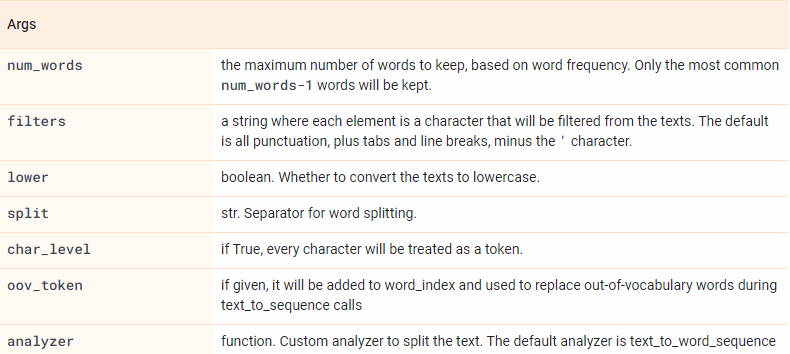

In [281]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [337]:
vocabulary = 10000
embedding = 30
max_length = 150
trunc_type= 'post'
oov_tok=""

#### vocabulary 10000 means 10000 unique words will be selected, and If the dataset has more than 10000 words, extra words will not be used to considered
#### embeddin represents the size of the vector that will be used to represent each word.  We'll set its value to 16 meaning, a vector of size 16 will be representing each word
#### maximum length of 120 words will be used for each piece of text or to predict a label. This is what is represented by the max_length parameter. If the text is originally bigger than that it will be truncated
#### trunc_type is set to be ‘post’. That means the text will be truncated at the end
#### If there is an unknown word that will be represented by oov_tok


In [338]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [339]:
tokenizer = Tokenizer(num_words = vocabulary, oov_token=oov_tok)
tokenizer.fit_on_texts(X['preprocessed_review'])
word_index = tokenizer.word_index
word_index

{'': 1,
 'movie': 2,
 'film': 3,
 'not': 4,
 'one': 5,
 'like': 6,
 'time': 7,
 'good': 8,
 'character': 9,
 'story': 10,
 'even': 11,
 'get': 12,
 'would': 13,
 'make': 14,
 'see': 15,
 'really': 16,
 'well': 17,
 'scene': 18,
 'much': 19,
 'bad': 20,
 'people': 21,
 'great': 22,
 'also': 23,
 'first': 24,
 'show': 25,
 'way': 26,
 'thing': 27,
 'made': 28,
 'life': 29,
 'could': 30,
 'think': 31,
 'go': 32,
 'know': 33,
 'watch': 34,
 'love': 35,
 'plot': 36,
 'actor': 37,
 'two': 38,
 'many': 39,
 'seen': 40,
 'year': 41,
 'say': 42,
 'end': 43,
 'never': 44,
 'acting': 45,
 'look': 46,
 'best': 47,
 'little': 48,
 'ever': 49,
 'man': 50,
 'better': 51,
 'take': 52,
 'come': 53,
 'work': 54,
 'still': 55,
 'part': 56,
 'something': 57,
 'director': 58,
 'find': 59,
 'want': 60,
 'back': 61,
 'give': 62,
 'lot': 63,
 'real': 64,
 'guy': 65,
 'watching': 66,
 'performance': 67,
 'woman': 68,
 'play': 69,
 'old': 70,
 'funny': 71,
 'though': 72,
 'another': 73,
 '10': 74,
 'actually': 

In [340]:
sequences = tokenizer.texts_to_sequences(X['preprocessed_review'])
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)

In [341]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(padded, y, test_size = 0.2, random_state = 152, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((40000, 150), (40000,))
shape of testing data is: ((10000, 150), (10000,))


In [342]:
from tensorflow.keras.layers import SimpleRNN, BatchNormalization, Dense, Embedding
from tensorflow.keras import Sequential

In [384]:
model = Sequential()
model.add(Embedding(vocabulary, embedding, input_length = max_length))
model.add(SimpleRNN(32, activation = 'relu'))
#model.add(SimpleRNN(32))
#model.add(SimpleRNN(16))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 150, 30)           300000    
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 32)                2016      
                                                                 
 dense_32 (Dense)            (None, 10)                330       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 302,357
Trainable params: 302,357
Non-trainable params: 0
_________________________________________________________________
None


In [385]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [386]:
history = model.fit(xtrain, ytrain, validation_split = 0.1, shuffle = True, verbose = 1, batch_size = 64, epochs = 30)

Epoch 1/30
563/563 [==============================] - 31s 52ms/step - loss: 0.5046 - accuracy: 0.7283 - val_loss: 0.3440 - val_accuracy: 0.8512
Epoch 2/30
563/563 [==============================] - 25s 44ms/step - loss: 0.2664 - accuracy: 0.8920 - val_loss: 0.3355 - val_accuracy: 0.8652
Epoch 3/30
563/563 [==============================] - 25s 44ms/step - loss: 0.2086 - accuracy: 0.9184 - val_loss: 0.3079 - val_accuracy: 0.8717
Epoch 4/30
563/563 [==============================] - 25s 44ms/step - loss: 0.1565 - accuracy: 0.9419 - val_loss: 0.3301 - val_accuracy: 0.8655
Epoch 5/30
563/563 [==============================] - 27s 47ms/step - loss: 0.1201 - accuracy: 0.9572 - val_loss: 0.3887 - val_accuracy: 0.8595
Epoch 6/30
563/563 [==============================] - 25s 44ms/step - loss: 0.0989 - accuracy: 0.9653 - val_loss: 0.4550 - val_accuracy: 0.8572
Epoch 7/30
563/563 [==============================] - 26s 46ms/step - loss: 0.0809 - accuracy: 0.9719 - val_loss: 0.4935 - val_accuracy:

In [387]:
predictions = model.predict(xtest)
predictions

313/313 [==============================] - 3s 9ms/step


array([[9.3200725e-01],
       [2.0502741e-02],
       [7.7403317e-10],
       ...,
       [2.1101318e-06],
       [2.2439948e-04],
       [1.0000000e+00]], dtype=float32)

### Notice how our predictions are in probabilities, as we have used sigmoid function in the output layer 

In [388]:
test_accuracy = model.evaluate(xtest, ytest)
test_accuracy

313/313 [==============================] - 3s 9ms/step - loss: 1.0962 - accuracy: 0.8370


[1.0962082147598267, 0.8370000123977661]

In [389]:
loss = test_accuracy[0]
loss

1.0962082147598267

In [390]:
accuracy = test_accuracy[1]
accuracy

0.8370000123977661

In [391]:
import seaborn as sns

### Train Vs Validation (Accuracy)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


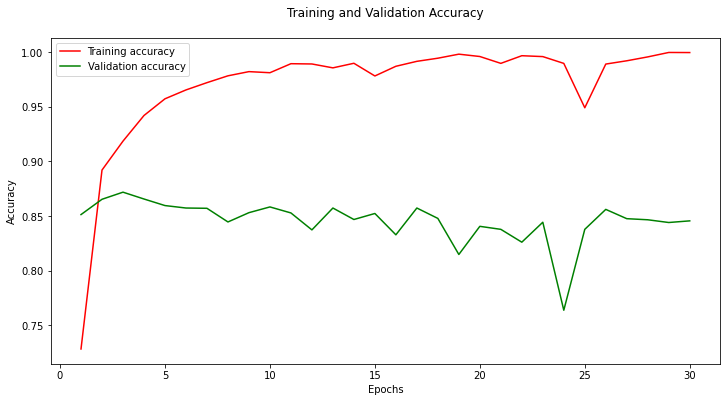

In [393]:
plt.figure(figsize = (12, 6))

train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy'] 
epoch = range(1, 31)
sns.lineplot(epoch, train_loss, color = 'red', label = 'Training accuracy')
sns.lineplot(epoch, val_loss, color = 'green', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Train Vs Validation (Loss)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


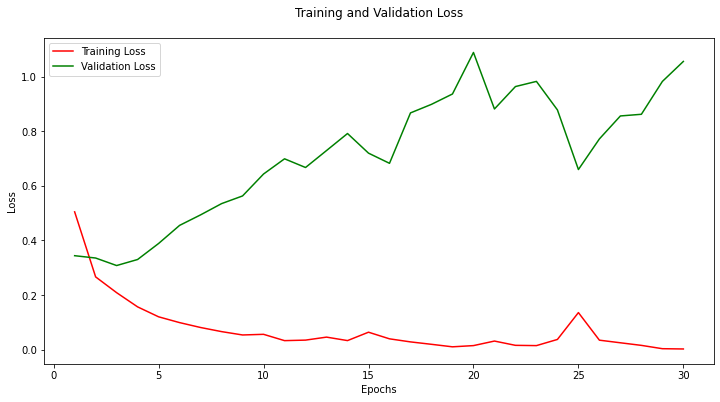

In [394]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(1, 31)
sns.lineplot(epoch, train_loss, color = 'red', label = 'Training Loss')
sns.lineplot(epoch, val_loss, color = 'green',label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [399]:
from sklearn.metrics import confusion_matrix, classification_report

In [400]:
predict = model.predict(xtest)
predict

313/313 [==============================] - 3s 8ms/step


array([[9.3200725e-01],
       [2.0502741e-02],
       [7.7403317e-10],
       ...,
       [2.1101318e-06],
       [2.2439948e-04],
       [1.0000000e+00]], dtype=float32)

In [401]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 3s 8ms/step - loss: 1.0962 - accuracy: 0.8370


[1.0962082147598267, 0.8370000123977661]

In [402]:
classes = np.argmax(predict,axis=1)
classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [405]:
cm = confusion_matrix(ytest, classes)
cm

array([[5016,    0],
       [4984,    0]], dtype=int64)

In [406]:
cr = classification_report(ytest, classes)
print(cr)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5016
           1       0.00      0.00      0.00      4984

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.34     10000



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
